## **Preposessing Dataset Training**

---

NIM/NAMA     : 10120729/Rissopan Panji Prayogi

## Installing Package

In [1]:
! pip install sastrawi

## Import Library

In [2]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data

In [10]:
train_data = """
Menurut Sri dan Cahyana, ChatGPT masuk dalam kategori pioneer alias pelopor seperti Super Apps dan Metaverse.

ChatGPT revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.

Rekor yang pernah dicapai ChatGPT, masih menurut data dari buku ini, adalah lulus ujian kedokteran di Amerika Serikat (AS). Hal ini bisa dicapai karena ChatGPT dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 GB dan terdiri dari crawled laman, buku, Wikipedia dll.
"""


# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [12]:
train_data



'\nMenurut Sri dan Cahyana, ChatGPT masuk dalam kategori pioneer alias pelopor seperti Super Apps dan Metaverse.\n\nChatGPT revolusioner dibanding search engine yang memberikan sumber-sumber jawaban, karena bisa merespon pertanyaan langsung membuatkan bentuk sumber jawabannya.\n\nRekor yang pernah dicapai ChatGPT, masih menurut data dari buku ini, adalah lulus ujian kedokteran di Amerika Serikat (AS). Hal ini bisa dicapai karena ChatGPT dilatih menggunakan dataset 300 miliar kata yang berasal dari dataset berukuran 570 GB dan terdiri dari crawled laman, buku, Wikipedia dll.\n'

## Null Values

In [17]:
null_count = train_data.count("null")
print("Jumlah null values:", null_count)


Jumlah null values: 0


## Data Types

In [21]:
# Bagi teks menjadi beberapa paragraf
paragraphs = train_data.split('\n')

# Hitung panjang karakter dari setiap paragraf
lengths = [len(paragraph) for paragraph in paragraphs]

# Hitung rata-rata panjang karakter
average_length = sum(lengths) / len(lengths)

print(f"Rata-rata panjang karakter setiap paragraf: {average_length:.2f}")


Rata-rata panjang karakter setiap paragraf: 81.29


In [23]:
total_length = len(train_data)
print(f"Jumlah panjang karakter : {total_length}")

Jumlah panjang karakter : 575


In [25]:
# Memisahkan teks menjadi kata-kata
words = train_data.split()

# Menghitung jumlah kata
word_count = len(words)

print(f"Jumlah kata: {word_count}")


Jumlah kata: 80


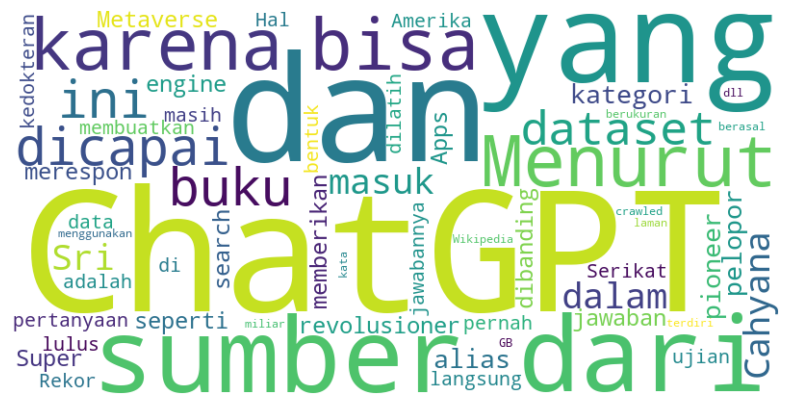

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Memisahkan teks menjadi kata-kata
words = train_data.split()

# Menggabungkan kata-kata menjadi satu string
all_words = ' '.join(words)

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [28]:
import copy

train_data_copy = copy.deepcopy(train_data)


## Case Folding

### Lowercase

In [29]:
def full_text_lowercase(full_text):
    full_text = full_text.lower()
    return full_text

In [30]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_lowercase)

TypeError: string indices must be integers, not 'str'

In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,@vidio kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya @lavaniforever kemarin titik
2,@vidio nyiarin indo vs usbek gk??,@vidio nyiarin indo vs usbek gk??
3,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,@vidio kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,@vidio ohhhh di court 4 ternyata ga ada kamera emang
5,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,@vidio lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,@vidio udah min mohon dicek,@vidio udah min mohon dicek
7,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh
8,@vidio Endingnya kayak Bourne Ultimatum,@vidio endingnya kayak bourne ultimatum
9,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_lowercase)

CPU times: total: 15.6 ms
Wall time: 2 ms


## Cleansing

### Menghapus username

In [ ]:
def full_text_delete_username(full_text):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    full_text = re.sub(userPattern, '', full_text)
    
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_username)

CPU times: total: 0 ns
Wall time: 3.01 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@vidio kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya @lavaniforever kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,@vidio nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,@vidio kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,@vidio ohhhh di court 4 ternyata ga ada kamera emang,ohhhh di court 4 ternyata ga ada kamera emang
5,@vidio lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,@vidio udah min mohon dicek,udah min mohon dicek
7,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh,saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh
8,@vidio endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_username)

CPU times: total: 0 ns
Wall time: 3 ms


### Menghapus url

In [ ]:
def full_text_delete_url(full_text):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    full_text = re.sub(urlPattern, '', full_text)
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_url)

CPU times: total: 0 ns
Wall time: 10 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,ohhhh di court 4 ternyata ga ada kamera emang,ohhhh di court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_url)

CPU times: total: 0 ns
Wall time: 9 ms


### Menghapus kelebihan huruf

In [ ]:
def full_text_delete_extra_letters(full_text):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    full_text = re.sub(sequencePattern, seqReplacePattern, full_text)
    
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 10 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,ohhhh di court 4 ternyata ga ada kamera emang,oh di court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 31.2 ms
Wall time: 13 ms


### Menghapus Noise

In [ ]:
def full_text_delete_noise(full_text):
        full_text = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', full_text)
        return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_noise)

CPU times: total: 0 ns
Wall time: 21.3 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh di court 4 ternyata ga ada kamera emang,oh court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl 28 kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_noise)

CPU times: total: 0 ns
Wall time: 12.1 ms


### Menghapus new line dan new text

In [ ]:
def full_text_delete_new_line_new_text(full_text):
    full_text = re.sub(r'\\[nt]', ' ', full_text)
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 3 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh court 4 ternyata ga ada kamera emang,oh court 4 ternyata ga ada kamera emang
5,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah mohon dicek,udah mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl 28 kemarin,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl 28 kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 997 µs


### Menghapus Hastag

In [ ]:
def full_text_remove_hashtags(full_text):
    hashtag= r'#\w+'
    full_text = re.sub(hashtag, '', full_text)
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 0 ns
Wall time: 4 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh court 4 ternyata ga ada kamera emang,oh court 4 ternyata ga ada kamera emang
5,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah mohon dicek,udah mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl 28 kemarin,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl 28 kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 15.6 ms
Wall time: 997 µs


### Menghapus angka

In [ ]:
def full_text_delete_number(full_text):
    number = r'\d+' 
    full_text = re.sub(number, '', full_text)
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_number)

CPU times: total: 15.6 ms
Wall time: 4.18 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh court 4 ternyata ga ada kamera emang,oh court ternyata ga ada kamera emang
5,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah mohon dicek,udah mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl 28 kemarin,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_number)

CPU times: total: 15.6 ms
Wall time: 6 ms


### Menghapus tanda baca

In [ ]:
def full_text_delete_punctuation(full_text):
    punctuationPattern = r'[^\w\s]' 
    full_text = re.sub(punctuationPattern, ' ', full_text)
    
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 0 ns
Wall time: 4.09 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh court ternyata ga ada kamera emang,oh court ternyata ga ada kamera emang
5,tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana
6,udah mohon dicek,udah mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl kemarin,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 0 ns
Wall time: 4.17 ms


### Menghapus Extra Spasi

In [ ]:
def full_text_delete_extra_space(full_text):
    full_text = re.sub(r"\s+", " ", full_text)
    full_text = re.sub(r"^\s+|\s+$", "", full_text)
    
    return full_text

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 15.6 ms
Wall time: 14 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik
1,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk,nyiarin indo vs usbek gk
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh court ternyata ga ada kamera emang,oh court ternyata ga ada kamera emang
5,tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana,tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana
6,udah mohon dicek,udah mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl kemarin,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl kemarin


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 15.6 ms
Wall time: 14.4 ms


## Tokenization

In [ ]:
from nltk.tokenize import word_tokenize 

In [ ]:
def full_text_tokenize(full_text):
    return word_tokenize(full_text)

In [ ]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_tokenize)

CPU times: total: 15.6 ms
Wall time: 121 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik,"[kenapa, match, lavani, vs, pbs, ga, bisa, diputar, mau, nonton, ulang, aksi, beik]"
1,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik,"[ga, mau, ga, ngasih, solusi, jg, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,nyiarin indo vs usbek gk,"[nyiarin, indo, vs, usbek, gk]"
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,"[kecewa, banget, udah, berbayar, tapi, gak, bisa, nonton, tim, uber, main]"
4,oh court ternyata ga ada kamera emang,"[oh, court, ternyata, ga, ada, kamera, emang]"
5,tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana,"[tau, gitu, mending, saya, langganan, spotv, aja, ini, sampai, final, emang, ga, akan, ditayangin, apa, gimana]"
6,udah mohon dicek,"[udah, mohon, dicek]"
7,saya udah langganan kenapa mau nonton gak bisa ya,"[saya, udah, langganan, kenapa, mau, nonton, gak, bisa, ya]"
8,endingnya kayak bourne ultimatum,"[endingnya, kayak, bourne, ultimatum]"
9,voli lavani vs sumsel babel gak bisa tonton ulang yg tgl kemarin,"[voli, lavani, vs, sumsel, babel, gak, bisa, tonton, ulang, yg, tgl, kemarin]"


In [ ]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_tokenize)

CPU times: total: 0 ns
Wall time: 139 ms


## Normalization

### Import Kamus

In [ ]:
kamus_singkatan = pd.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [ ]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [ ]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [ ]:
def full_text_replace_contractions(full_text):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    full_text = pattern.sub(lambda x: kamus[x.group()], full_text)
    return full_text

In [ ]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_full_text in train_data["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 6.83 s
Wall time: 8.63 s


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[kenapa, match, lavani, vs, pbs, ga, bisa, diputar, mau, nonton, ulang, aksi, beik]","[kenapa, match, lavani, vs, pbs, tidak, bisa, diputar, mau, nonton, ulang, aksi, beik]"
1,"[ga, mau, ga, ngasih, solusi, jg, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]","[tidak, mau, tidak, kasih, solusi, juga, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,"[nyiarin, indo, vs, usbek, gk]","[nyiarin, indo, vs, usbek, tidak]"
3,"[kecewa, banget, udah, berbayar, tapi, gak, bisa, nonton, tim, uber, main]","[kecewa, sekali, sudah, berbayar, tapi, tidak, bisa, nonton, tim, uber, main]"
4,"[oh, court, ternyata, ga, ada, kamera, emang]","[oh, court, ternyata, tidak, ada, kamera, memang]"
5,"[tau, gitu, mending, saya, langganan, spotv, aja, ini, sampai, final, emang, ga, akan, ditayangin, apa, gimana]","[tahu, begitu, mending, saya, langganan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]"
6,"[udah, mohon, dicek]","[sudah, mohon, dicek]"
7,"[saya, udah, langganan, kenapa, mau, nonton, gak, bisa, ya]","[saya, sudah, langganan, kenapa, mau, nonton, tidak, bisa, ya]"
8,"[endingnya, kayak, bourne, ultimatum]","[endingnya, mirip, bourne, ultimatum]"
9,"[voli, lavani, vs, sumsel, babel, gak, bisa, tonton, ulang, yg, tgl, kemarin]","[voli, lavani, vs, sumsel, babel, tidak, bisa, tonton, ulang, yang, tanggal, kemarin]"


In [ ]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_full_text in train_data_copy["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data_copy["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 7.36 s
Wall time: 7.95 s


### Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()

In [ ]:
def tweet_stemming(tweet):
    # Check if the input is a list
    if isinstance(tweet, list):
        stemmed_tweets = []
        # Iterate through each tweet in the list
        for t in tweet:
            # Create a stemmer object
            stemmer = factory.create_stemmer()
            # Stem the tweet and append to the list of stemmed tweets
            stemmed_tweets.append(stemmer.stem(t))
        # Return the list of stemmed tweets
        return stemmed_tweets
    else:
        # If the input is not a list, create a stemmer object
        stemmer = factory.create_stemmer()
        # Stem the single tweet and return
        return stemmer.stem(tweet)

In [ ]:
train_data["full_text"] = train_data["full_text"].apply(tweet_stemming)

In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[kenapa, match, lavani, vs, pbs, tidak, bisa, diputar, mau, nonton, ulang, aksi, beik]","[kenapa, match, lavani, vs, pbs, tidak, bisa, putar, mau, nonton, ulang, aksi, beik]"
1,"[tidak, mau, tidak, kasih, solusi, juga, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]","[tidak, mau, tidak, kasih, solusi, juga, solusi, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,"[nyiarin, indo, vs, usbek, tidak]","[nyiarin, indo, vs, usbek, tidak]"
3,"[kecewa, sekali, sudah, berbayar, tapi, tidak, bisa, nonton, tim, uber, main]","[kecewa, sekali, sudah, bayar, tapi, tidak, bisa, nonton, tim, uber, main]"
4,"[oh, court, ternyata, tidak, ada, kamera, memang]","[oh, court, nyata, tidak, ada, kamera, memang]"
5,"[tahu, begitu, mending, saya, langganan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]","[tahu, begitu, mending, saya, langgan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]"
6,"[sudah, mohon, dicek]","[sudah, mohon, cek]"
7,"[saya, sudah, langganan, kenapa, mau, nonton, tidak, bisa, ya]","[saya, sudah, langgan, kenapa, mau, nonton, tidak, bisa, ya]"
8,"[endingnya, mirip, bourne, ultimatum]","[endingnya, mirip, bourne, ultimatum]"
9,"[voli, lavani, vs, sumsel, babel, tidak, bisa, tonton, ulang, yang, tanggal, kemarin]","[voli, lavani, vs, sumsel, babel, tidak, bisa, tonton, ulang, yang, tanggal, kemarin]"


In [ ]:
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_stemming)

## Saving Preposessing

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists of full_texts into a single string
all_full_texts = ' '.join([full_text for sublist in train_data['full_text'] for full_text in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_full_texts)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


NameError: name 'train_data' is not defined

In [ ]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,"[match, lavani, vs, pbs, putar, nonton, ulang, aksi, beik]"
1,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,"[kasih, solusi, solusi, re, upload, match, proliga, kemarin, titik]"
2,@vidio nyiarin indo vs usbek gk??,"[nyiarin, indo, vs, usbek]"
3,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,"[kecewa, bayar, nonton, tim, uber, main]"
4,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,"[oh, court, kamera]"
5,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,"[mending, langgan, spotv, final, ditayangin, gimana]"
6,@vidio udah min mohon dicek,[cek]
7,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,"[langgan, nonton]"
8,@vidio Endingnya kayak Bourne Ultimatum,"[endingnya, bourne, ultimatum]"
9,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,"[voli, lavani, vs, sumsel, babel, tonton, ulang, tanggal, kemarin]"


In [ ]:
train_data.to_csv("Dataset/Training/Clean_train_data_full.csv")